<a href="https://colab.research.google.com/github/kaushal320/Lung_cancer_ml_project/blob/main/DL_face_Mask_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:05<00:00, 42.5MB/s]
100% 163M/163M [00:05<00:00, 32.5MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2468.jpg', 'with_mask_2688.jpg', 'with_mask_3291.jpg', 'with_mask_1610.jpg', 'with_mask_947.jpg']
['with_mask_1308.jpg', 'with_mask_976.jpg', 'with_mask_3320.jpg', 'with_mask_817.jpg', 'with_mask_916.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1165.jpg', 'without_mask_2947.jpg', 'without_mask_1624.jpg', 'without_mask_484.jpg', 'without_mask_2613.jpg']
['without_mask_1598.jpg', 'without_mask_1062.jpg', 'without_mask_3623.jpg', 'without_mask_2306.jpg', 'without_mask_3630.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


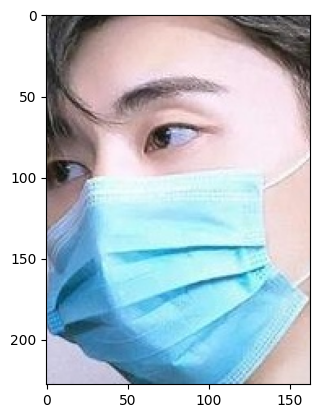

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

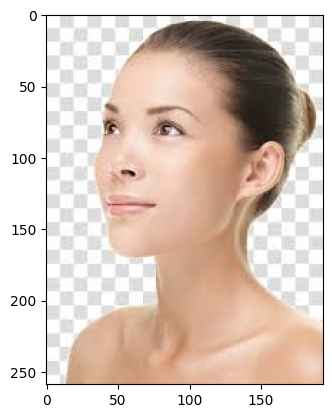

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[128, 128, 138],
        [112, 112, 122],
        [ 98,  98, 108],
        ...,
        [169, 159, 160],
        [146, 136, 137],
        [132, 122, 123]],

       [[133, 131, 140],
        [116, 114, 122],
        [102, 100, 109],
        ...,
        [161, 151, 152],
        [146, 137, 138],
        [137, 127, 128]],

       [[134, 129, 135],
        [118, 113, 118],
        [104,  99, 105],
        ...,
        [146, 138, 139],
        [140, 132, 133],
        [137, 129, 130]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
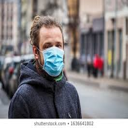

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
print(Y)

[1 1 1 ... 0 0 0]


TRAIN TEST SPLIT


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[128,  62,  88],
        [ 93,  37,  61],
        [ 84,  42,  61],
        ...,
        [ 90,  70,  76],
        [167, 149, 147],
        [219, 202, 197]],

       [[122,  60,  84],
        [ 92,  40,  63],
        [ 84,  46,  64],
        ...,
        [ 98,  79,  84],
        [180, 162, 160],
        [216, 199, 194]],

       [[114,  58,  80],
        [ 88,  42,  63],
        [ 78,  46,  62],
        ...,
        [107,  87,  93],
        [197, 179, 177],
        [211, 194, 189]],

       ...,

       [[113,  70,  82],
        [124,  79,  92],
        [140,  94, 104],
        ...,
        [102,  99, 128],
        [100,  97, 126],
        [ 99,  96, 125]],

       [[119,  75,  89],
        [113,  68,  82],
        [115,  69,  81],
        ...,
        [ 87,  83, 126],
        [ 77,  73, 116],
        [ 86,  82, 125]],

       [[118,  74,  89],
        [ 99,  53,  69],
        [112,  65,  78],
        ...,
        [ 80,  79, 119],
        [ 77,  75, 115],
        [ 86,  85, 125]]], dtype=uint8)
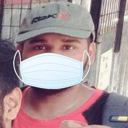

In [27]:
X_train[0]

In [28]:
X_train_scaled[0]

array([[[0.50196078, 0.24313725, 0.34509804],
        [0.36470588, 0.14509804, 0.23921569],
        [0.32941176, 0.16470588, 0.23921569],
        ...,
        [0.35294118, 0.2745098 , 0.29803922],
        [0.65490196, 0.58431373, 0.57647059],
        [0.85882353, 0.79215686, 0.77254902]],

       [[0.47843137, 0.23529412, 0.32941176],
        [0.36078431, 0.15686275, 0.24705882],
        [0.32941176, 0.18039216, 0.25098039],
        ...,
        [0.38431373, 0.30980392, 0.32941176],
        [0.70588235, 0.63529412, 0.62745098],
        [0.84705882, 0.78039216, 0.76078431]],

       [[0.44705882, 0.22745098, 0.31372549],
        [0.34509804, 0.16470588, 0.24705882],
        [0.30588235, 0.18039216, 0.24313725],
        ...,
        [0.41960784, 0.34117647, 0.36470588],
        [0.77254902, 0.70196078, 0.69411765],
        [0.82745098, 0.76078431, 0.74117647]],

       ...,

       [[0.44313725, 0.2745098 , 0.32156863],
        [0.48627451, 0.30980392, 0.36078431],
        [0.54901961, 0

BUILDING A CNN

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - acc: 0.7178 - loss: 0.6668 - val_acc: 0.8826 - val_loss: 0.2748
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - acc: 0.8867 - loss: 0.2935 - val_acc: 0.8992 - val_loss: 0.2439
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9137 - loss: 0.2396 - val_acc: 0.8876 - val_loss: 0.2617
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9267 - loss: 0.1908 - val_acc: 0.9041 - val_loss: 0.2281
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9339 - loss: 0.1693 - val_acc: 0.9157 - val_loss: 0.2218


MODEL EVALUATION

In [33]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9210 - loss: 0.2088
Test Accuracy = 0.9245532751083374


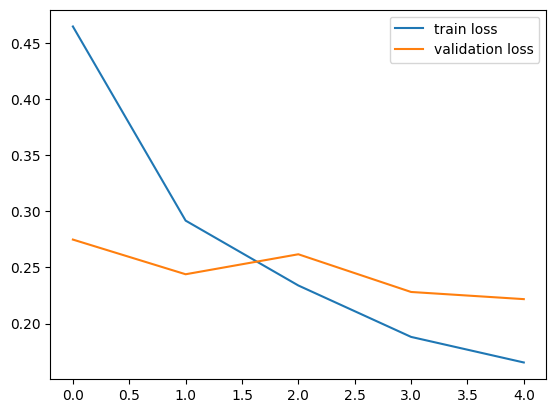

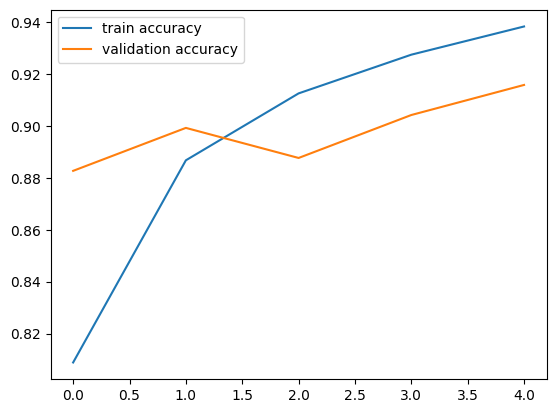

In [34]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM

Path of the image to be predicted: /content/not_wearing_mask.jpg


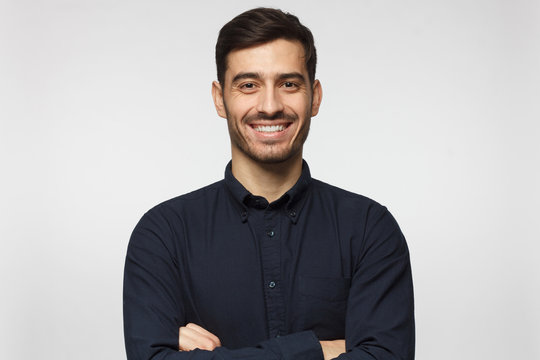

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.58651906 0.46764266]]
0
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [1]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: content/wearing_mask.jpg


NameError: name 'cv2' is not defined